In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pylab

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [50]:
#порождающие модели
def f_1(x):
    return 10*x[0] + np.random.randn()

def f_2(x):
    return 50*x[0] + np.random.randn()

In [51]:
#порождение данных с нулевым дополнением признаков
n = 200 

x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
y1 = np.array([f_1(x) for x in x1])
y2 = np.array([f_2(x) for x in x2])
#две выборки, когда признаки заполняются нулями
X1 = np.hstack([x1, np.zeros([n,1])])
X2 = np.hstack([np.zeros([n,1]), x2])
                
X = np.vstack([X1, X2])
y = np.hstack([y1, y2])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=5)

In [53]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
pred = lin_mod.predict(X_test)
score = metrics.mean_squared_error(y_test, pred)

w1 = lin_mod.coef_[0]
w2 = lin_mod.coef_[1]
print(w1, w2, score)

10.077189328562975 50.003620591939075 1.064530059421627


In [68]:
plt.rcParams['lines.linewidth'] = 37
plt.rcParams['lines.markersize'] = 15
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 40

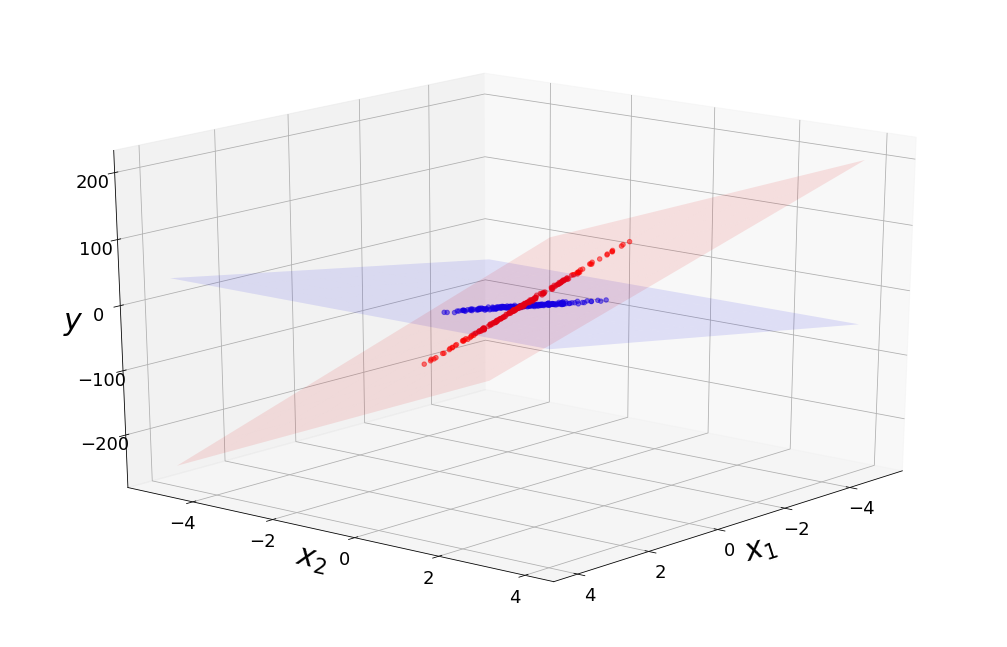

In [55]:
fig = plt.figure(figsize=(15, 10))

b = [0 for i in range(n)]

ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))

z1 = 0.0001 * np.array(xx) + w2* np.array(yy)
z2 = w1 * np.array(xx) + 0.0001*np.array(yy)
ax.scatter(X[0:200, 0],X[0:200, 1], y1, alpha=0.5, color='blue')
ax.scatter(X[200:400, 0],X[200:400, 1], y2, alpha=0.5, color='red')
ax.plot_surface(xx, yy, z1, alpha = 0.1, color = 'red')
ax.plot_surface(xx, yy, z2, alpha = 0.1, color = 'blue')
ax.view_init(20,40)
ax.set_xlabel('$x_1$', fontsize=30, fontweight="bold")
ax.set_ylabel('$x_2$', fontsize=30, fontweight="bold")
ax.set_zlabel('$y$', fontsize=30, fontweight="bold")
fig.tight_layout()
savefig('experiment1-zeros.pdf')

In [56]:
#порождение данных со случайным дополнением признаков
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
y1 = np.array([f_1(x) for x in x1])
y2 = np.array([f_2(x) for x in x2])

X1 = np.hstack([x1, np.random.randn(n,1)]) 
X2 = np.hstack([np.random.randn(n,1), x2])
                
X = np.vstack([X1, X2])
y = np.hstack([y1, y2])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=5)

In [58]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
pred = lin_mod.predict(X_test)
score = metrics.mean_squared_error(y_test, pred)

w1 = lin_mod.coef_[0]
w2 = lin_mod.coef_[1]
print(w1, w2, score)

5.249690001563013 24.397513688654108 649.5320659461606


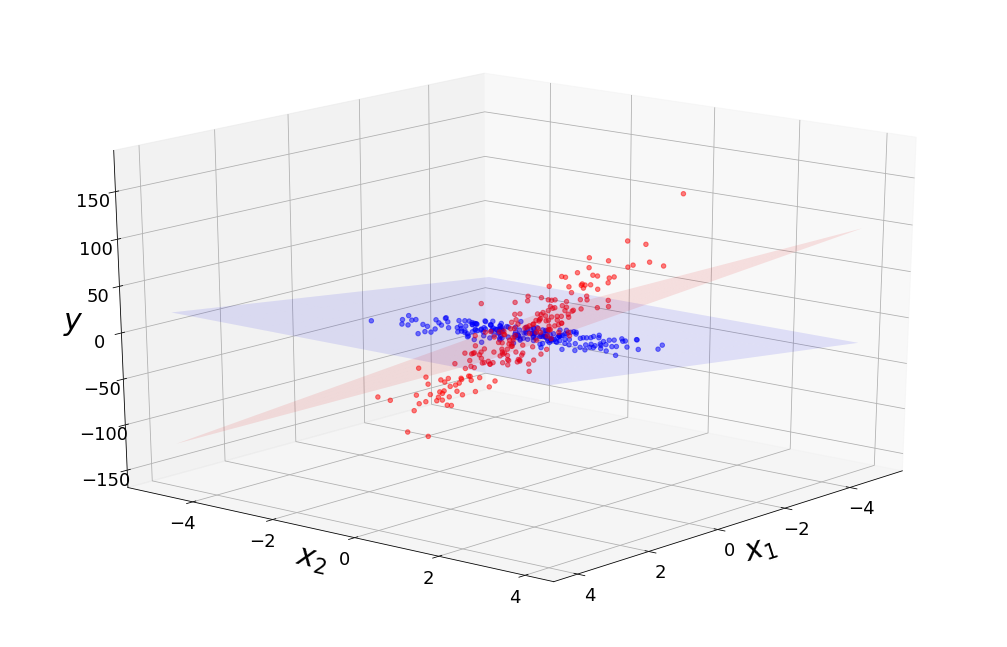

In [64]:
fig = plt.figure(figsize=(15, 10))

b = [0 for i in range(n)]

ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))

z1 = 0.0001 * np.array(xx) + w2* np.array(yy)
z2 = w1 * np.array(xx) + 0.0001*np.array(yy)
ax.scatter(X[0:200, 0],X[0:200, 1], y1, alpha=0.5, color='blue')
ax.scatter(X[200:400, 0],X[200:400, 1], y2, alpha=0.5, color='red')
ax.plot_surface(xx, yy, z1, alpha = 0.1, color = 'red')
ax.plot_surface(xx, yy, z2, alpha = 0.1, color = 'blue')
ax.view_init(20,40)
ax.set_xlabel('$x_1$', fontsize=30, fontweight="bold")
ax.set_ylabel('$x_2$', fontsize=30, fontweight="bold")
ax.set_zlabel('$y$', fontsize=30, fontweight="bold")
ax.set_facecolor('white')
fig.set_facecolor('white')
fig.tight_layout()
savefig('experiment1-random.pdf')